### Characteristic time scales 

The goal of this notebook is to get a rough idea of the time scales at play for the signals 
so as to properly aggregate the data.
I tackle this point by:
- getting few signals which vary significantly
- plotting the corresponding time series
- estimating the associated time scale


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


First I sort the data by ascending order of interquartile distance. I will focus on datasets associated to train 1 
which vary significantly with time

In [2]:
processStat=pd.read_csv('/Users/greghor/Documents/taf/dataScience/PG_hackathon/processStat.csv')

In [3]:
# sort the data in the descending order of interquartile distance
res=processStat.sort_values(by='interQuart',ascending=False)
# consider the data only for train 1
resTrain_1=res[res.train_1==1]

In [4]:


# store variables in dictionnary, the key corresponds to the type of signal
fNKey=['Temperature','Flow','Pressure']
fName=dict() #  filename 
df=dict() # dataframe 

filePath='/Volumes/UGENT/dataScience/PG_hackathon/dataset/'

for key in fNKey:
    fName[key]=resTrain_1[resTrain_1.nature==key].iloc[0].tag_anon  #get csv filename
    #iloc[0] is the signal that shows the largest interquartile distance for each type of signal
    df[key] = pd.read_csv(filePath + fName[key] + '.csv', sep=',', names = ["dt", "val"]) # read csv file


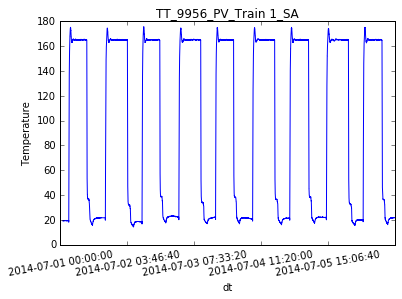

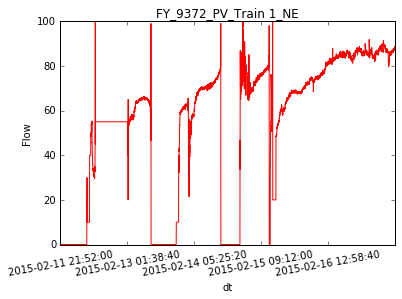

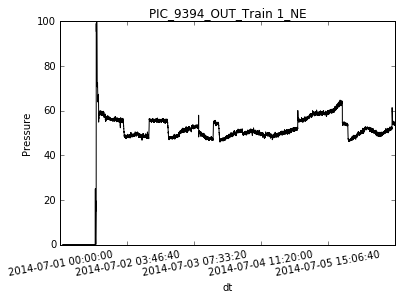

In [8]:
# display the time series on few days
%matplotlib inline

col={"Temperature":'b','Flow':'r','Pressure':'k'}

nbPoints=100000

for key in fNKey:
    df[key].iloc[:nbPoints].plot(x="dt",y='val',legend=None,color=col[key])
    plt.xticks(rotation=10)
    plt.ylabel(key)
    plt.title(fName[key])


The figures above show the evolution on few days of temperature, flow and pressure. 
The patterns differ significantly between each signal. 
The temperature signal is periodic with time scale $\sim 1$ day. The pressure 
is smoother but still shows some sudden jump. The flow signal is probably the most challenging to interpret 
since it displays erratic jump and even sometimes, the data are absent. 

Note even tought I displayed the same number of points for each signal, the x-axis (the time)
are not the same. This means that the sampling rate (i.e. time between two sucessive measurements) is 
not the same for all signals. That surely something that we have to keep in mind


Let's reduce now the number of points for which the signals are displayed such that to analyze
the fine scales. 

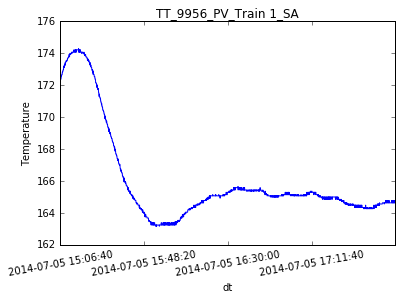

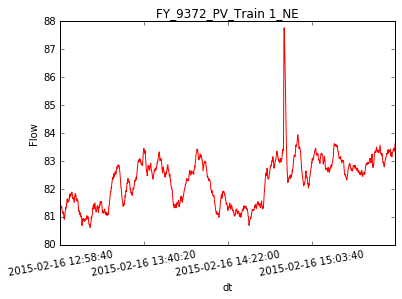

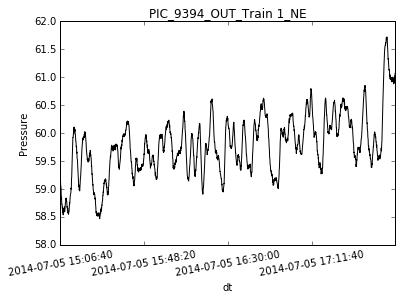

In [9]:
# display the time series on small time window
%matplotlib inline

iStart=80000
iStop=iStart+2000

for key in fNKey:
    df[key].iloc[iStart:iStop].plot(x="dt",y='val',legend=None,color=col[key])
    plt.xticks(rotation=10)
    plt.ylabel(key)
    plt.title(fName[key])

Obviously the temperature and flow vary on a longer time scale $~1 h$ than the pressure $ 10 min$. 
This raises the question if it makes sense to aggregate all signals on the same time scale? 
Something that we shall discuss during the next meeting